In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_DA=pd.read_csv("gsearch_jobs.csv",index_col=0)

In [5]:
df_DA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61953 entries, 0 to 61952
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                61953 non-null  int64  
 1   title                61953 non-null  object 
 2   company_name         61953 non-null  object 
 3   location             61916 non-null  object 
 4   via                  61944 non-null  object 
 5   description          61953 non-null  object 
 6   extensions           61953 non-null  object 
 7   job_id               61953 non-null  object 
 8   thumbnail            38194 non-null  object 
 9   posted_at            61763 non-null  object 
 10  schedule_type        61707 non-null  object 
 11  work_from_home       27980 non-null  object 
 12  salary               10088 non-null  object 
 13  search_term          61953 non-null  object 
 14  date_time            61953 non-null  object 
 15  search_location      61953 non-null  obje

# Data Cleaning

In [6]:
df_DA.drop(columns=['index','commute_time','salary','extensions','posted_at'],axis=1,inplace=True)
df_DA.sort_values(by='date_time',inplace=True)
df_DA['date_time']=pd.to_datetime(df_DA['date_time'])
df_DA['description_tokens']=df_DA['description_tokens'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills )
df_DA.reset_index(drop=True, inplace=True)

In [7]:
df_DA = df_DA.rename(columns={'title' : 'job_title',
                      'description' : 'job_description',
                      'search_term' : 'job_Title_short',
                      'search_location' : 'country',
                      'description_tokens' : 'job_skills'
                      })

# Salary Analysis

In [8]:
# Drop NAN based on salary_standardized coulmn
df_DA = df_DA.dropna(subset='salary_standardized')

In [9]:
df_DA

,job_title,company_name,location,via,job_description,job_id,thumbnail,schedule_type,work_from_home,job_Title_short,date_time,country,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,job_skills
0,Data Analyst II,EDWARD JONES,"Bates City, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,NaN,Full-time,NaN,data analyst,2022-11-04 03:40:11.151943,United States,76798–130764,a year,103781.000,76798.00,130764.00,NaN,103781.0,103781.0,"[power_bi, excel, sas, snowflake, sql, spss, r..."
5,Data Analyst,Upwork,Anywhere,via Upwork,Apply at: https://datobite.com/\n\nRESPONSIBIL...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,Contractor,True,data analyst,2022-11-04 03:40:11.151943,United States,15–50,an hour,32.500,15.00,50.00,32.500,NaN,67600.0,[]
6,Data Analyst - Finance (Remote),Drip,Anywhere,via Built In,"At Drip, we believe any ecommerce brand should...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBGaW5hbm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Full-time,True,data analyst,2022-11-04 03:40:11.151943,United States,80K–100K,a year,90000.000,80000.00,100000.00,NaN,90000.0,90000.0,"[spreadsheet, sql]"
7,Data Analyst / Analytics,ACS,United States,via WANE Jobs,_Data Analyst - 100% Remote - Financial Servic...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLyBBbmFseX...,NaN,Full-time,NaN,data analyst,2022-11-04 03:40:11.151943,United States,35,an hour,35.000,NaN,NaN,35.000,NaN,72800.0,"[excel, sql]"
8,Sr. Business Data Analyst,New American Funding,United States,via KSNT Jobs,Must be able to work on Pacific Standard Time\...,eyJqb2JfdGl0bGUiOiJTci4gQnVzaW5lc3MgRGF0YSBBbm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Full-time,NaN,data analyst,2022-11-04 03:40:11.151943,United States,100K,a year,100000.000,NaN,NaN,NaN,100000.0,100000.0,"[power_bi, tableau, ssis, snowflake, ssrs, sql]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61897,Data Analyst,Gunnison County,"Gunnison, CO",DataAnalyst.com,Gunnison County is hiring a Data Analyst with ...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,Full-time,NaN,data analyst,2025-04-18 03:00:13.756407,United States,56.2K–64K,a year,60100.000,56200.00,64000.00,NaN,60100.0,60100.0,[sql]
61899,Data Analyst III,Fanatics,"Denver, CO (+1 other)",Built In Colorado,Company Overview\n\nFanatics is building a lea...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUlJIiwiY2...,https://serpapi.com/searches/6801c03bb9b0b2ebe...,Full-time,NaN,data analyst,2025-04-18 03:00:13.756407,United States,108K–198K,a year,153000.000,108000.00,198000.00,NaN,153000.0,153000.0,"[tableau, excel, sql]"
61901,Data Analyst,City of Grand Junction,"Grand Junction, CO",GovernmentJobs.com,"DATA ANALYST\nHiring Range: $6,390 - $7,191 Mo...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJjb21wYW...,NaN,Full-time,NaN,data analyst,2025-04-18 03:00:13.756407,United States,6390.80–7191.60,a month,6791.200,6390.80,7191.60,NaN,NaN,81494.4,[]
61902,Data Analyst with Mongo DB,Ehub Global solution,"Denver, CO",Indeed,"Role: Data AnalysisLocation: Denver, CO (Onsit...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3Qgd2l0aCBNb2...,NaN,Contractor,NaN,data analyst,2025-04-18 03:00:13.756407,United States,46.29–55.74,an hour,51.015,46.29,55.74,51.015,NaN,106111.2,"[mongo, python, shell, pl/sql, sql]"


In [10]:
df_DA_2023 = df_DA[df_DA['date_time'].dt.year == 2023]
df_DA_2024 = df_DA[df_DA['date_time'].dt.year == 2024]

In [11]:
# Explode job_skills so that each skill appears in a separate row (one-to-many)
df_DA_2023_exploded = df_DA_2023.explode('job_skills')
df_DA_2024_exploded = df_DA_2024.explode('job_skills')

In [12]:
# Group by job_skills → calculate median salary & count
# Sort first by count (demand), then by median (salary)
top_count_2023 = df_DA_2023_exploded.groupby('job_skills')['salary_standardized'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)
top_count_2024 = df_DA_2024_exploded.groupby('job_skills')['salary_standardized'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)

top_count_2023.sort_values(by='median',ascending=False,inplace=True)
top_count_2024.sort_values(by='median',ascending=False,inplace=True)

In [13]:
#  Group data by job_skills , Calculate count and median , and sort values by median in descending order
top_pay_2023 = df_DA_2023_exploded.groupby('job_skills')['salary_standardized'].agg(['median','count']).sort_values(by='median',ascending=False).head(10)
top_pay_2024 = df_DA_2024_exploded.groupby('job_skills')['salary_standardized'].agg(['median','count']).sort_values(by='median',ascending=False).head(10)

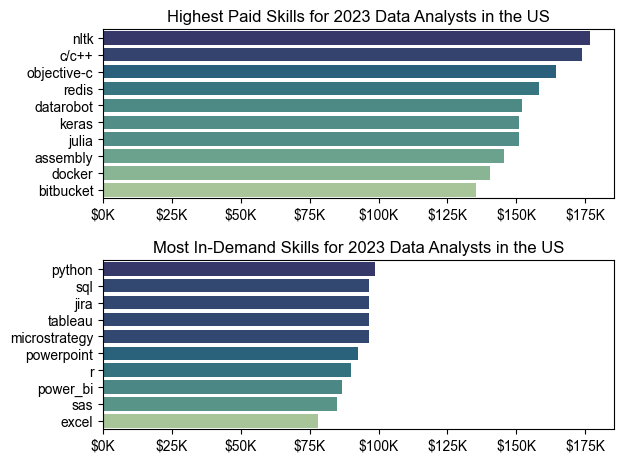

In [15]:
# Visualization: Compare highest paid vs most in-demand skills for 2023
fig, ax = plt.subplots(2, 1)  

palette = sns.color_palette("crest", as_cmap=True)


# Top 10 Highest Paid Skills for 2023 Data Analysts
sns.barplot(data=top_pay_2023, x='median', y=top_pay_2023.index, hue='median', ax=ax[0] , palette =palette )
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for 2023 Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Most In-Demand Skills for 2023 Data Analysts
sns.barplot(data=top_count_2023, x='median', y=top_count_2023.index, hue='median', ax=ax[1], palette = palette)
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for 2023 Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

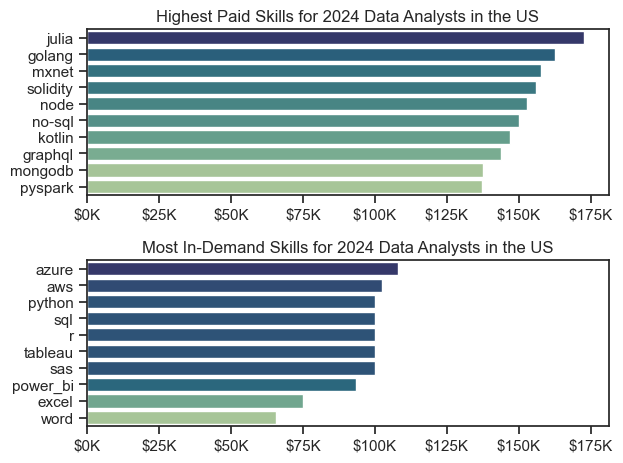

In [16]:
# Visualization: Compare highest paid vs most in-demand skills for 2023
fig, ax = plt.subplots(2, 1)  

palette = sns.color_palette("crest", as_cmap=True)

# Top 10 Highest Paid Skills for 2024 Data Analysts
sns.barplot(data=top_pay_2024, x='median', y=top_pay_2024.index, hue='median', ax=ax[0] , palette= palette)
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for 2024 Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Most In-Demand Skills for 2024 Data Analyst
sns.barplot(data=top_count_2024, x='median', y=top_count_2024.index, hue='median', ax=ax[1],palette=palette)
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for 2024 Data Analysts in the US')
ax[1].set_ylabel('')

ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()